# Mean-Shift Clustering with Non Parametric Estimation

Mean Shift is a nonparametric clustering algorithm that identifies clusters in a dataset by iteratively shifting data points towards the mode (peak) of the data distribution. It does not assume a specific shape for clusters and can adapt to irregularly shaped and varying-sized clusters.

Procedure:
  1. Place a window (kernel) on each data point.
  2. Calculate the mean shift vector, pointing towards the direction of the 3. steepest increase in data density within the window.
  4. Shift the data point in the direction of the mean shift vector.
  5. Repeat steps 2-3 until convergence.
  6. Points converging to the same mode belong to the same cluster.

NOTE: Nonparametric estimation helps you understand the overall distribution of individuals, and Mean-Shift Clustering takes this a step further by pinpointing where groups naturally form based on higher densities.

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=5000, centers=centers, cluster_std=0.4)


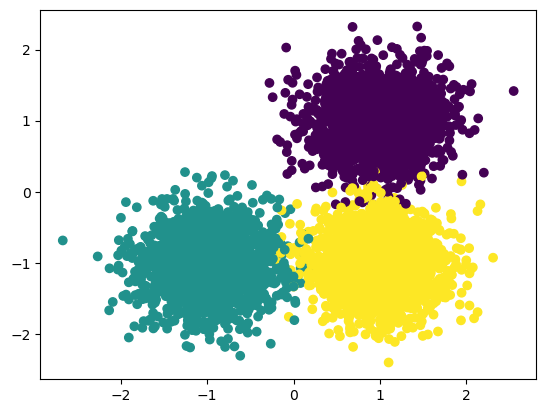

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

0.751690268965335

In [5]:
# #############################################################################
# Compute clustering with MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=0.751690268965335, bin_seeding=True)

In [6]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(labels)
print(cluster_centers)

[2 0 2 ... 0 1 0]
[[ 0.99954654  0.98262525]
 [-1.01398831 -0.98802461]
 [ 0.99702852 -0.98614623]]


In [7]:
labels_unique = np.unique(labels)
print(labels_unique)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print("Estimated Bandwidth: %f" %bandwidth)

[0 1 2]
number of estimated clusters : 3
Estimated Bandwidth: 0.751690


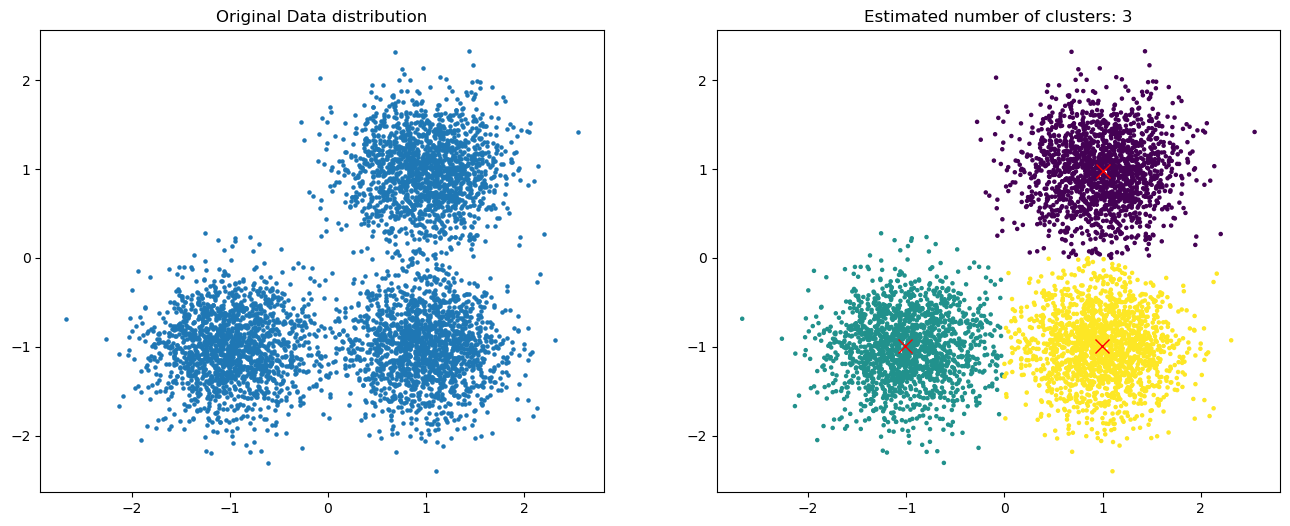

In [8]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X[:,0],X[:,1],s=5)
ax[0].set_title('Original Data distribution')
ax[1].scatter(X[:,0],X[:,1],s=5,c=labels)
ax[1].plot(cluster_centers[:,0], cluster_centers[:,1], 'x', markersize=10,c='red')
ax[1].set_title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Meanshift with Exoplanet dataset

In [9]:
import pandas as pd
df=pd.read_csv('http://exoplanets.org/csv-files/exoplanets.csv')
df.head()

C:\Users\vwadhawan\AppData\Local\Temp\ipykernel_13868\646712869.py:2: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('http://exoplanets.org/csv-files/exoplanets.csv')


,A,AUPPER,ALOWER,UA,AREF,AURL,AR,ARUPPER,ARLOWER,UAR,...,VREF,VURL,VSINI,VSINIUPPER,VSINILOWER,UVSINI,VSINIREF,VSINIURL,KEPID,KDE
0,0.078010,0.001300,0.001300,0.001300,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,11.9153,0.443805,0.443805,0.443805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.034472,0.000676,0.000676,0.000676,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,15.1619,0.974724,0.974724,0.974724,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
2,0.137610,0.002897,0.002897,0.002897,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,31.8896,3.494090,3.494090,3.494090,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
3,0.091351,0.001903,0.001903,0.001903,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,14.5835,2.181770,2.181770,2.181770,...,NaN,NaN,3.0,1.0,1.0,1.0,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,NaN,1
4,0.185149,0.008817,0.008817,0.008817,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,33.2523,10.100600,10.100600,10.100600,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1


In [10]:
import seaborn as sns

In [11]:
df = df[['NAME', 'MSINI', 'A']].dropna()

In [12]:
df = df.rename(columns={'NAME': 'Name',
                        'MSINI':'Mass',
                        'A': 'Distance'}).set_index('Name').astype(float)
df

,Mass,Distance
Name,,
Kepler-427 b,0.310432,0.091351
WASP-14 b,7.654570,0.036769
NN Ser d,0.642621,3.705960
WASP-105 b,1.759190,0.074547
GJ 625 b,0.008929,0.078362
...,...,...
WASP-1 b,0.827536,0.038520
XO-5 b,1.150820,0.050865
HAT-P-3 b,0.595021,0.038825


In [13]:
df = df.drop(df[df['Mass'] == 0].index)

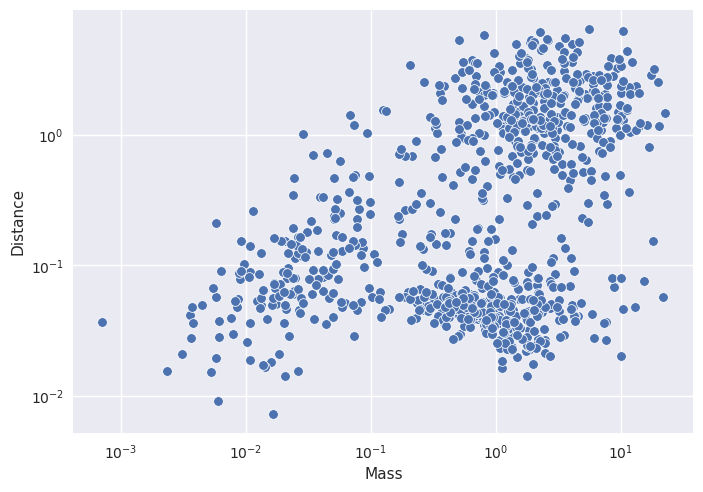

In [14]:
with plt.style.context('seaborn'):
    sns.scatterplot(data=df, x='Mass', y='Distance')

plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
data=df.iloc[:,].to_numpy()

In [16]:
data.shape

(963, 2)

In [17]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [18]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data, quantile=0.2)
bandwidth

1.6248953451400903

In [19]:
# #############################################################################
# Compute clustering with MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)

MeanShift(bandwidth=1.6248953451400903, bin_seeding=True)

In [20]:
labels=ms.labels_
print(labels)
cluster_centers=ms.cluster_centers_
print(cluster_centers)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 1 8 0 0 0 0 0 0 0
 0 3 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 7 0 0 0 0 0 1 2 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 1 1 0 0 0 1 0 0 1 6 0 0 1 0 2 0 0 0 2 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 0
 0 0 1 5 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 9 0 2 0 0 0
 1 0 0 0 0 1 0 0 8 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 6 0 0 0 0 1
 0 0 2 0 0 0 0 0 0 0 0 1 1 1 0 2 1 0 0 0 0 0 0 0 8 0 0 1 0 0 0 0 8 0 0 0 0
 2 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 2 0 0 0 0 0 

In [21]:
print('unique labels', np.unique(labels))
print('No of clusters', len(np.unique(labels)))

unique labels [0 1 2 3 4 5 6 7 8 9]
No of clusters 10


In [22]:
# # #############################################################################
# # Plot result
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1,2,figsize=(16,6))
# ax[0].scatter(data[:,0],data[:,1],s=5)
# ax[0].set_title('Original Data distribution')
# ax[1].scatter(data[:,0],data[:,1],s=5,c=labels)
# ax[1].plot(cluster_centers[:,0], cluster_centers[:,1], 'x', markersize=10,c='red')
# ax[1].set_title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

In [23]:
df['target']=labels
df.head()

,Mass,Distance,target
Name,,,
Kepler-427 b,0.310432,0.091351,0
WASP-14 b,7.654570,0.036769,1
NN Ser d,0.642621,3.705960,0
WASP-105 b,1.759190,0.074547,0
GJ 625 b,0.008929,0.078362,0


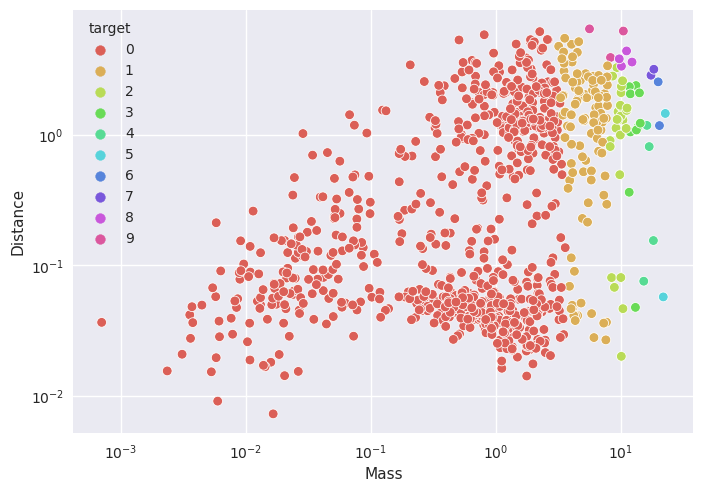

In [24]:
with plt.style.context('seaborn'):
    sns.scatterplot(data=df, x='Mass', y='Distance', hue='target',
                    palette=sns.color_palette("hls", 10))

plt.xscale('log')
plt.yscale('log')
plt.show()

## Image Segmentation using Mean-Shift Algorithm

In [25]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from PIL import Image

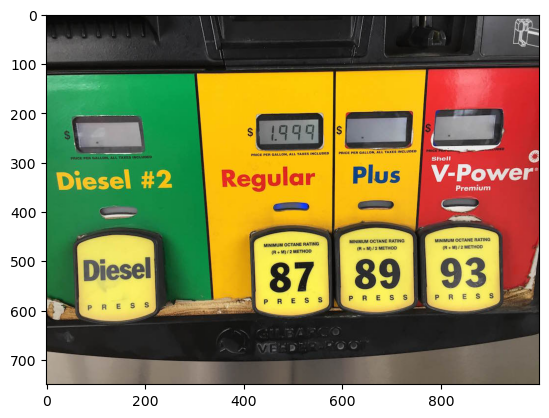

In [26]:
#Segmentation of Color Image
img = Image.open('sample.jpg')
plt.imshow(img)


In [27]:
img = np.array(img)
print(img.shape)
#Need to convert image into feature array based
flatten_img = np.reshape(img, [-1, 3])
flatten_img.shape

(750, 1000, 3)


(750000, 3)

In [28]:
#bandwidth estimation
est_bandwidth = estimate_bandwidth(flatten_img,quantile=0.2, n_samples=500)
est_bandwidth

71.27643898965988

In [29]:
mean_shift = MeanShift(bandwidth=est_bandwidth, bin_seeding=True)
mean_shift.fit(flatten_img)

MeanShift(bandwidth=71.27643898965988, bin_seeding=True)

In [30]:
labels= mean_shift.labels_

print("number of estimated clusters : %d" % len(np.unique(labels)))
print("Estimated Bandwidth: %f" %est_bandwidth)

number of estimated clusters : 4
Estimated Bandwidth: 71.276439


In [31]:
print(labels.shape)

(750000,)


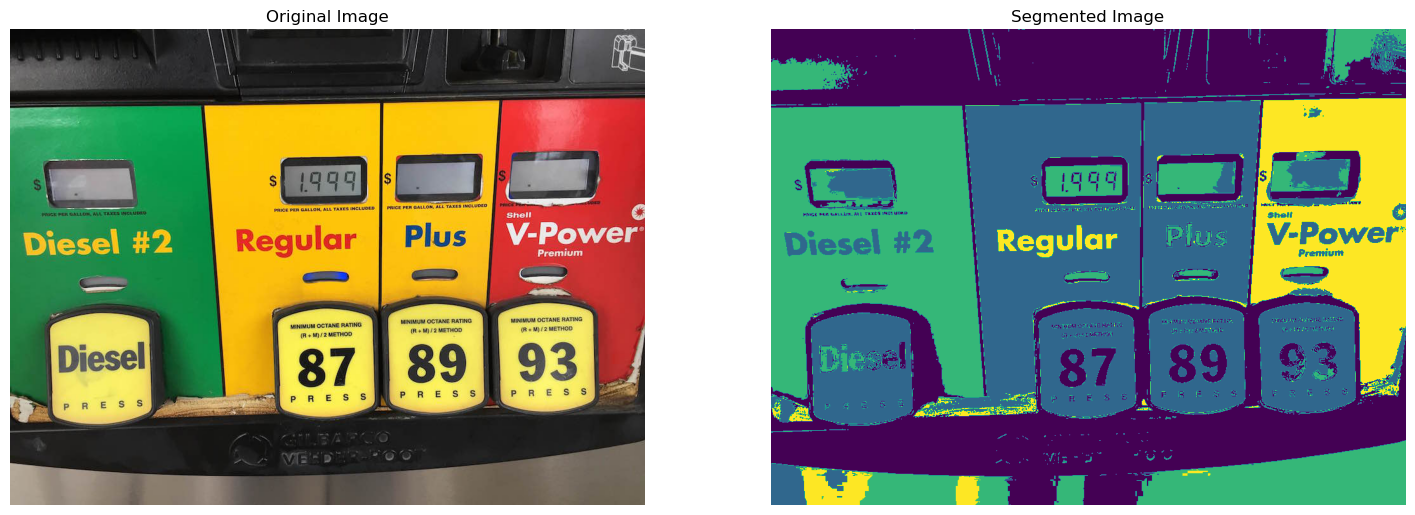

In [32]:
# Plot image vs segmented image
fig, axs = plt.subplots(1,2,figsize=(18,12))
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title("Original Image")
axs[1].imshow(np.reshape(labels, (img.shape[0],img.shape[1])))
axs[1].axis('off')
axs[1].set_title("Segmented Image")
plt.show()

In [33]:
# Reshape labels to the original image size
labels = labels.reshape(img.shape[0], img.shape[1])
labels

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int64)

In [34]:
# Create segmented image using labels
segmented_image = np.zeros_like(img)
# for label in np.unique(labels):
color = np.random.randint(0, 255, 3)
segmented_image[labels == 1] = color

In [35]:
segmented_image

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[41, 12, 93],
        [41, 12, 93],
        [41, 12, 93],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[41, 12, 93],
        [41, 12, 93],
        [41, 12, 93],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[41, 12, 93],
        [41, 12, 93],
        [41, 12, 93],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

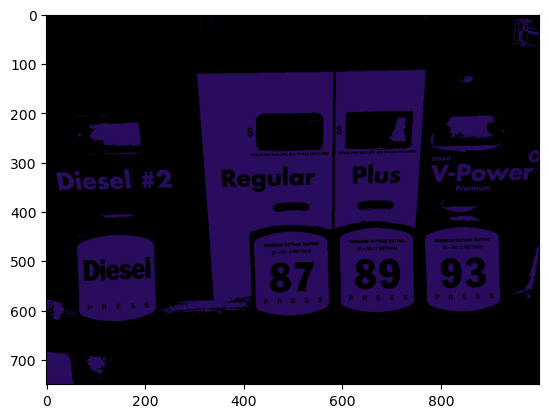

In [36]:
plt.imshow(segmented_image)

## Exercise 1
Perfrom image segmentation using K-Means and compare the results with Meanshift

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load an image
image = cv2.imread('sample.jpg')  # Replace with the path to your image

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image to a 2D array of pixels
image_flat = image_rgb.reshape((-1, 3))

# Convert to float32 for KMeans
image_flat = np.float32(image_flat)

# Specify the number of clusters (you can experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(image_flat)

# Get labels and reshape to the original image size
labels = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])

# Create segmented image using labels


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
segmented_image = np.zeros_like(image_rgb)
# for label in range(num_clusters):
color = np.random.randint(0, 255, 3)
segmented_image[labels == 0] = color



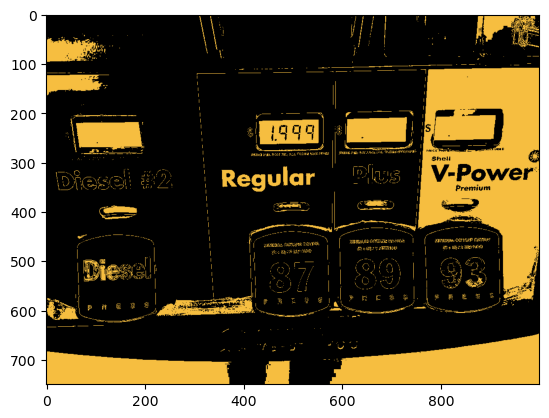

In [39]:
plt.imshow(segmented_image)

# Exercise 2
Medical image analysis
data: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation/

## Tracking of Object in a Video using Mean-Shift Algorithm

In [40]:
import cv2
import numpy as np
import os

### Convert images to video

In [41]:
#from zipfile import ZipFile
#with ZipFile("content/Ball_Dataset.zip", 'r') as zObject: 
  
    # Extracting specific file in the zip 
    # into a specific location. 
#    zObject.extractall(path="content/Ball_Dataset")
#zObject.close() 



In [42]:
from os.path import isfile, join

def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

    for i in range(len(files)-1):
        filename = pathIn + files[i]
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        frame_array.append(img)

    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'),fps, size)

    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()

In [43]:
pathIn = "content/Ball_Dataset/"
pathOut = "video_ball.avi"
fps = 30.0
convert_frames_to_video(pathIn, pathOut, fps)

content/Ball_Dataset/00000001.jpg
content/Ball_Dataset/00000002.jpg
content/Ball_Dataset/00000003.jpg
content/Ball_Dataset/00000004.jpg
content/Ball_Dataset/00000005.jpg
content/Ball_Dataset/00000006.jpg
content/Ball_Dataset/00000007.jpg
content/Ball_Dataset/00000008.jpg
content/Ball_Dataset/00000009.jpg
content/Ball_Dataset/00000010.jpg
content/Ball_Dataset/00000011.jpg
content/Ball_Dataset/00000012.jpg
content/Ball_Dataset/00000013.jpg
content/Ball_Dataset/00000014.jpg
content/Ball_Dataset/00000015.jpg
content/Ball_Dataset/00000016.jpg
content/Ball_Dataset/00000017.jpg
content/Ball_Dataset/00000018.jpg
content/Ball_Dataset/00000019.jpg
content/Ball_Dataset/00000020.jpg
content/Ball_Dataset/00000021.jpg
content/Ball_Dataset/00000022.jpg
content/Ball_Dataset/00000023.jpg
content/Ball_Dataset/00000024.jpg
content/Ball_Dataset/00000025.jpg
content/Ball_Dataset/00000026.jpg
content/Ball_Dataset/00000027.jpg
content/Ball_Dataset/00000028.jpg
content/Ball_Dataset/00000029.jpg
content/Ball_D

content/Ball_Dataset/00000243.jpg
content/Ball_Dataset/00000244.jpg
content/Ball_Dataset/00000245.jpg
content/Ball_Dataset/00000246.jpg
content/Ball_Dataset/00000247.jpg
content/Ball_Dataset/00000248.jpg
content/Ball_Dataset/00000249.jpg
content/Ball_Dataset/00000250.jpg
content/Ball_Dataset/00000251.jpg
content/Ball_Dataset/00000252.jpg
content/Ball_Dataset/00000253.jpg
content/Ball_Dataset/00000254.jpg
content/Ball_Dataset/00000255.jpg
content/Ball_Dataset/00000256.jpg
content/Ball_Dataset/00000257.jpg
content/Ball_Dataset/00000258.jpg
content/Ball_Dataset/00000259.jpg
content/Ball_Dataset/00000260.jpg
content/Ball_Dataset/00000261.jpg
content/Ball_Dataset/00000262.jpg
content/Ball_Dataset/00000263.jpg
content/Ball_Dataset/00000264.jpg
content/Ball_Dataset/00000265.jpg
content/Ball_Dataset/00000266.jpg
content/Ball_Dataset/00000267.jpg
content/Ball_Dataset/00000268.jpg
content/Ball_Dataset/00000269.jpg
content/Ball_Dataset/00000270.jpg
content/Ball_Dataset/00000271.jpg
content/Ball_D

content/Ball_Dataset/00000486.jpg
content/Ball_Dataset/00000487.jpg
content/Ball_Dataset/00000488.jpg
content/Ball_Dataset/00000489.jpg
content/Ball_Dataset/00000490.jpg
content/Ball_Dataset/00000491.jpg
content/Ball_Dataset/00000492.jpg
content/Ball_Dataset/00000493.jpg
content/Ball_Dataset/00000494.jpg
content/Ball_Dataset/00000495.jpg
content/Ball_Dataset/00000496.jpg
content/Ball_Dataset/00000497.jpg
content/Ball_Dataset/00000498.jpg
content/Ball_Dataset/00000499.jpg
content/Ball_Dataset/00000500.jpg
content/Ball_Dataset/00000501.jpg
content/Ball_Dataset/00000502.jpg
content/Ball_Dataset/00000503.jpg
content/Ball_Dataset/00000504.jpg
content/Ball_Dataset/00000505.jpg
content/Ball_Dataset/00000506.jpg
content/Ball_Dataset/00000507.jpg
content/Ball_Dataset/00000508.jpg
content/Ball_Dataset/00000509.jpg
content/Ball_Dataset/00000510.jpg
content/Ball_Dataset/00000511.jpg
content/Ball_Dataset/00000512.jpg
content/Ball_Dataset/00000513.jpg
content/Ball_Dataset/00000514.jpg
content/Ball_D

In [44]:
video = cv2.VideoCapture("./video_ball.avi")

_,first_frame = video.read()
# cv2.imshow("First_Frame",first_frame)
# cv2.waitKey(0)
print(first_frame.shape)

(240, 320, 3)


In [45]:
x = 200
y = 110
width = 50
height = 50
roi = first_frame[y:y+height, x:x+width]
# cv2.imshow('ROI',roi)
# cv2.waitKey(0)

In [46]:
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi],[0],None, [360], [0,360])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

In [47]:
#from google.colab.patches import cv2_imshow
#import cv2
while True:
    _, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([hsv], [0], roi_hist, [0,360], 1)

    _, track_window = cv2.meanShift(mask, (x,y,width,height), term_criteria)
    x,y,w,h = track_window
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)

    cv2.imshow("video", mask)
    cv2.imshow("video", frame)

    key = cv2.waitKey(30)
    if key == 27:
        break

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# New Section

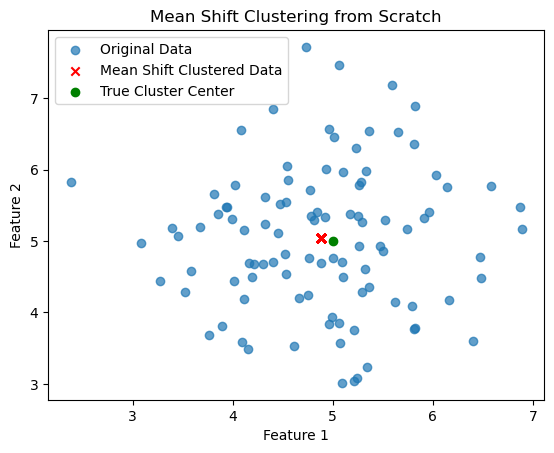

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for one cluster
np.random.seed(42)
cluster_center = [5, 5]
data = cluster_center + np.random.randn(100, 2)

# Mean Shift clustering from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mean_shift(data, bandwidth=1.0, max_iter=100, convergence_threshold=1e-4):
    points = np.copy(data)

    for _ in range(max_iter):
        old_points = np.copy(points)

        for i in range(len(points)):
            # Calculate mean shift
            shift = np.zeros_like(points[i])
            total_weight = 0

            for j in range(len(points)):
                distance = euclidean_distance(points[i], points[j])
                weight = np.exp(-0.5 * (distance / bandwidth) ** 2)
                shift += weight * points[j]
                total_weight += weight

            shift /= total_weight
            points[i] = shift

        # Check for convergence
        if np.linalg.norm(points - old_points) < convergence_threshold:
            break

    return points

# Perform Mean Shift clustering
result = mean_shift(data, bandwidth=1.5)

# Plot the original data and the clustered data
plt.scatter(data[:, 0], data[:, 1], label='Original Data', alpha=0.7)
plt.scatter(result[:, 0], result[:, 1], label='Mean Shift Clustered Data', marker='x', color='red')
plt.scatter(cluster_center[0], cluster_center[1], label='True Cluster Center', marker='o', color='green')

plt.title('Mean Shift Clustering from Scratch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


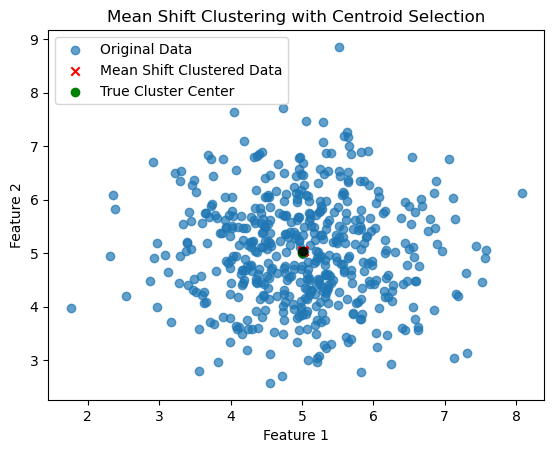

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for one cluster
np.random.seed(42)
cluster_center = [5, 5]
data = cluster_center + np.random.randn(500, 2)

# Mean Shift clustering from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mean_shift(data, bandwidth=1.0, max_iter=100, convergence_threshold=1e-4):
    points = np.copy(data)
    centroids = []

    for _ in range(max_iter):
        old_points = np.copy(points)
        centroids.append(np.mean(points, axis=0))

        for i in range(len(points)):
            # Calculate mean shift
            shift = np.zeros_like(points[i])
            total_weight = 0

            for j in range(len(points)):
                distance = euclidean_distance(points[i], points[j])
                weight = np.exp(-0.5 * (distance / bandwidth) ** 2)
                shift += weight * points[j]
                total_weight += weight

            shift /= total_weight
            points[i] = shift

        # Check for convergence
        if np.linalg.norm(points - old_points) < convergence_threshold:
            break

    return points, np.array(centroids)

# Perform Mean Shift clustering
result, centroids = mean_shift(data, bandwidth=1.5)

# Plot the original data and the clustered data
plt.scatter(data[:, 0], data[:, 1], label='Original Data', alpha=0.7)
plt.scatter(result[:, 0], result[:, 1], label='Mean Shift Clustered Data', marker='x', color='red')
plt.scatter(cluster_center[0], cluster_center[1], label='True Cluster Center', marker='o', color='green')

# Plot the selected centroids at each iteration
centroids = np.array(centroids)
for i in range(centroids.shape[0]):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='o', color='black', alpha=0.2)

plt.title('Mean Shift Clustering with Centroid Selection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [50]:
centroids

array([[5.0036012 , 5.03506291],
       [5.00395798, 5.03055712],
       [5.00809469, 5.03463784],
       [5.00823797, 5.03543726],
       [5.00823512, 5.03551895],
       [5.00823542, 5.03551486],
       [5.00823537, 5.03551294]])

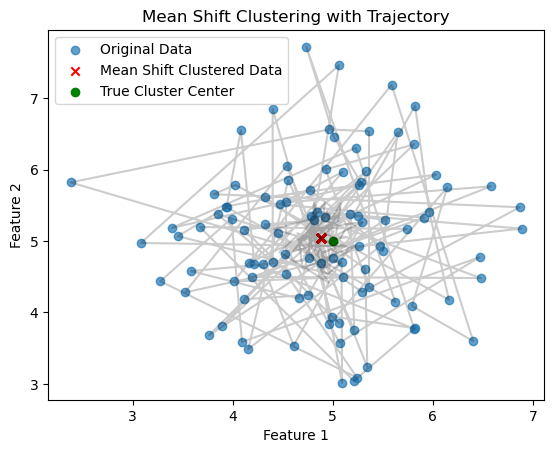

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for one cluster
np.random.seed(42)
cluster_center = [5, 5]
data = cluster_center + np.random.randn(100, 2)

# Mean Shift clustering from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mean_shift(data, bandwidth=1.0, max_iter=100, convergence_threshold=1e-4):
    points = np.copy(data)
    trajectories = []

    for _ in range(max_iter):
        old_points = np.copy(points)
        trajectories.append(np.copy(points))

        for i in range(len(points)):
            # Calculate mean shift
            shift = np.zeros_like(points[i])
            total_weight = 0

            for j in range(len(points)):
                distance = euclidean_distance(points[i], points[j])
                weight = np.exp(-0.5 * (distance / bandwidth) ** 2)
                shift += weight * points[j]
                total_weight += weight

            shift /= total_weight
            points[i] = shift

        # Check for convergence
        if np.linalg.norm(points - old_points) < convergence_threshold:
            break

    return points, np.array(trajectories)

# Perform Mean Shift clustering
result, trajectories = mean_shift(data, bandwidth=1.5)

# Plot the original data and the clustered data
plt.scatter(data[:, 0], data[:, 1], label='Original Data', alpha=0.7)
plt.scatter(result[:, 0], result[:, 1], label='Mean Shift Clustered Data', marker='x', color='red')
plt.scatter(cluster_center[0], cluster_center[1], label='True Cluster Center', marker='o', color='green')

# Plot the trajectories
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], color='black', alpha=0.2)

plt.title('Mean Shift Clustering with Trajectory')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


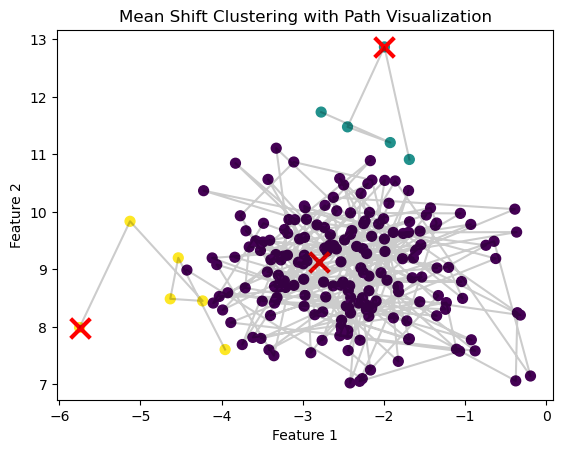

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# Generate random data
X, _ = make_blobs(n_samples=200, centers=1, cluster_std=1.0, random_state=42)

# Estimate bandwidth (important for Mean Shift)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

# Fit Mean Shift model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=ms.labels_, cmap='viridis', s=50)

# Plot the mean shift path for each point
for i in range(len(np.unique(ms.labels_))):
    path = X[ms.labels_ == i]
    plt.plot(path[:, 0], path[:, 1], color='black', alpha=0.2)

# Highlight cluster centers
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red')

plt.title('Mean Shift Clustering with Path Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


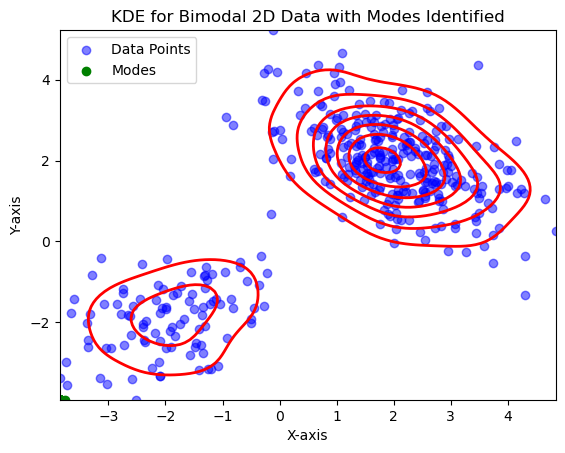

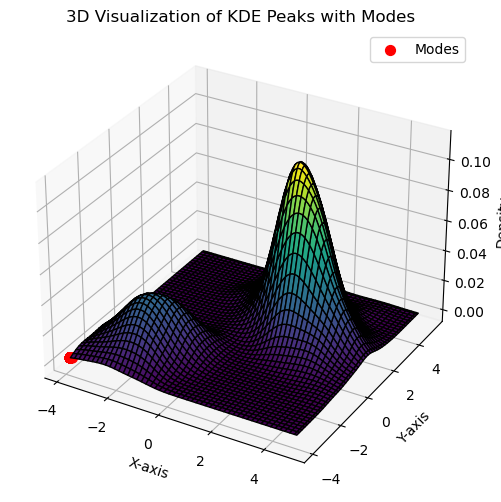

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import label, generate_binary_structure

# Function to generate 2D data with two peaks
def generate_bimodal_data():
    np.random.seed(42)
    data1 = np.random.multivariate_normal(mean=[-2, -2], cov=[[1, 0.5], [0.5, 1]], size=100)
    data2 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, -0.5], [-0.5, 1]], size=300)
    return np.concatenate([data1, data2])

# Generate bimodal 2D data
data_2d_bimodal = generate_bimodal_data()

# Create a KDE model for 2D data
kde_2d_bimodal = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde_2d_bimodal.fit(data_2d_bimodal)

# Generate points for plotting in 2D
x_plot = np.linspace(min(data_2d_bimodal[:, 0]), max(data_2d_bimodal[:, 0]), 100)
y_plot = np.linspace(min(data_2d_bimodal[:, 1]), max(data_2d_bimodal[:, 1]), 100)
x_plot, y_plot = np.meshgrid(x_plot, y_plot)
xy_plot = np.column_stack([x_plot.ravel(), y_plot.ravel()])

# Evaluate the KDE model on the generated points
log_dens_2d_bimodal = kde_2d_bimodal.score_samples(xy_plot)

# Reshape the results for contour plotting
log_dens_2d_bimodal = log_dens_2d_bimodal.reshape(x_plot.shape)

# Plot the original 2D data points
plt.scatter(data_2d_bimodal[:, 0], data_2d_bimodal[:, 1], alpha=0.5, color='blue', label='Data Points')

# Plot contours of the KDE estimate
plt.contour(x_plot, y_plot, np.exp(log_dens_2d_bimodal), levels=10, colors='red', linewidths=2)

# Identify modes using gradient ascent
structure = generate_binary_structure(2, 2)
local_maxima, num_maxima = label(log_dens_2d_bimodal == np.max(log_dens_2d_bimodal), structure=structure)
modes = xy_plot[local_maxima[:, :].ravel()]

# Highlight identified modes
plt.scatter(modes[:, 0], modes[:, 1], color='green', marker='o', label='Modes')

plt.title('KDE for Bimodal 2D Data with Modes Identified')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# Visualize KDE peaks in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for 3D surface plot
x_plot_3d, y_plot_3d = np.meshgrid(x_plot[0, :], y_plot[:, 0])  # Use 1D arrays for meshgrid
z_plot_3d = np.exp(log_dens_2d_bimodal)

# Plot 3D surface
ax.plot_surface(x_plot_3d, y_plot_3d, z_plot_3d, cmap='viridis', edgecolor='k')

# Scatter plot for modes
ax.scatter(modes[:, 0], modes[:, 1], np.exp(kde_2d_bimodal.score_samples(modes)), color='red', marker='o', s=50, label='Modes')

ax.set_title('3D Visualization of KDE Peaks with Modes')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Density')

plt.legend()
plt.show()


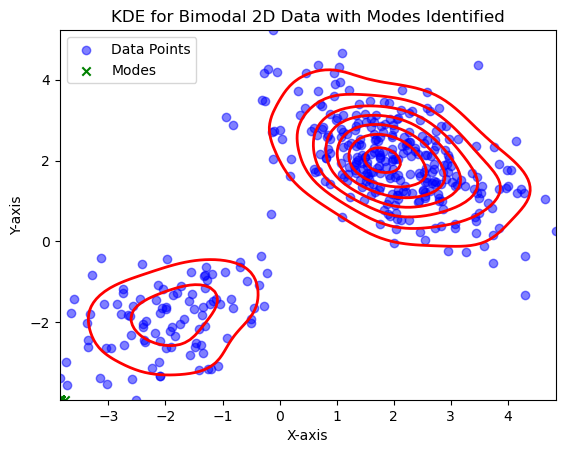

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.ndimage import label, generate_binary_structure

# Function to generate 2D data with two peaks
def generate_bimodal_data():
    np.random.seed(42)
    data1 = np.random.multivariate_normal(mean=[-2, -2], cov=[[1, 0.5], [0.5, 1]], size=100)
    data2 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, -0.5], [-0.5, 1]], size=300)
    return np.concatenate([data1, data2])

# Generate bimodal 2D data
data_2d_bimodal = generate_bimodal_data()

# Create a KDE model for 2D data
kde_2d_bimodal = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde_2d_bimodal.fit(data_2d_bimodal)

# Generate points for plotting in 2D
x_plot = np.linspace(min(data_2d_bimodal[:, 0]), max(data_2d_bimodal[:, 0]), 100)
y_plot = np.linspace(min(data_2d_bimodal[:, 1]), max(data_2d_bimodal[:, 1]), 100)
x_plot, y_plot = np.meshgrid(x_plot, y_plot)
xy_plot = np.column_stack([x_plot.ravel(), y_plot.ravel()])

# Evaluate the KDE model on the generated points
log_dens_2d_bimodal = kde_2d_bimodal.score_samples(xy_plot)

# Reshape the results for contour plotting
log_dens_2d_bimodal = log_dens_2d_bimodal.reshape(x_plot.shape)

# Plot the original 2D data points
plt.scatter(data_2d_bimodal[:, 0], data_2d_bimodal[:, 1], alpha=0.5, color='blue', label='Data Points')

# Plot contours of the KDE estimate
plt.contour(x_plot, y_plot, np.exp(log_dens_2d_bimodal), levels=10, colors='red', linewidths=2)

# Identify modes using gradient ascent
structure = generate_binary_structure(2, 2)
local_maxima, num_maxima = label(log_dens_2d_bimodal == np.max(log_dens_2d_bimodal), structure=structure)
modes = xy_plot[local_maxima[:, :].ravel()]

# Highlight identified modes
plt.scatter(modes[:, 0], modes[:, 1], color='green', marker='x', label='Modes')

plt.title('KDE for Bimodal 2D Data with Modes Identified')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

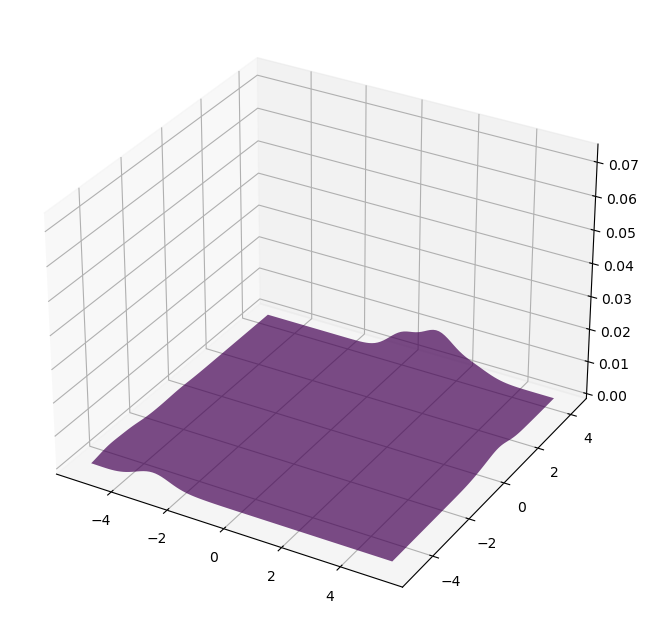

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Function to generate 2D data with two peaks
def generate_2d_data_with_peaks():
    np.random.seed(42)
    peak1 = np.random.multivariate_normal(mean=[-2, -2], cov=[[1, 0.5], [0.5, 1]], size=300)
    peak2 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, -0.5], [-0.5, 1]], size=300)
    data_2d_peaks = np.concatenate([peak1, peak2])
    return data_2d_peaks

# Function to perform KDE and visualize gradient ascent paths
def visualize_kde_and_gradient_ascent(data_2d):
    # Create a KDE model for 2D data
    kde_2d = KernelDensity(bandwidth=0.5, kernel='gaussian')
    kde_2d.fit(data_2d)

    # Generate points for plotting in 2D
    x_plot = np.linspace(min(data_2d[:, 0]), max(data_2d[:, 0]), 100)
    y_plot = np.linspace(min(data_2d[:, 1]), max(data_2d[:, 1]), 100)
    x_plot, y_plot = np.meshgrid(x_plot, y_plot)
    xy_plot = np.column_stack([x_plot.ravel(), y_plot.ravel()])

    # Evaluate the KDE model on the generated points
    log_dens_2d = kde_2d.score_samples(xy_plot)

    # Reshape the results for contour plotting
    log_dens_2d = log_dens_2d.reshape(x_plot.shape)

    # Visualize KDE in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x_plot, y_plot, np.exp(log_dens_2d), cmap='viridis', alpha=0.7, rstride=100, cstride=100)

    # Gradient ascent to find multiple modes
    gradient_ascent_paths = []

    def gradient_ascent(starting_point, learning_rate=0.05, num_steps=100):
        path = [starting_point]
        current_point = starting_point

        for _ in range(num_steps):
            # Compute the gradient of the KDE at the current point
            gradient = np.array(np.gradient(np.exp(kde_2d.score_samples([current_point])))).flatten()

            # Update the current point using gradient ascent
            current_point = current_point + learning_rate * gradient

            # Append the current point to the path
            path.append(current_point)

        return np.array(path)

    # Perform gradient ascent from multiple starting points
    starting_points = np.array([[-2, -2], [2, 2]])
    for starting_point in starting_points:
        path = gradient_ascent(starting_point)
        gradient_ascent_paths.append(path)

    # Plot the gradient ascent paths
    for path in gradient_ascent_paths:
        ax.plot(path[:, 0], path[:, 1], np.exp(kde_2d.score_samples(path)), marker='o', markersize=5, label='Gradient Ascent Path')

    ax.set_title('KDE and Gradient Ascent Paths')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Density')
    ax.legend()

    plt.show()

# Generate 2D data with two peaks
data_2d_peaks = generate_2d_data_with_peaks()

# Visualize KDE and gradient ascent paths
visualize_kde_and_gradient_ascent(data_2d_peaks)


# New Section

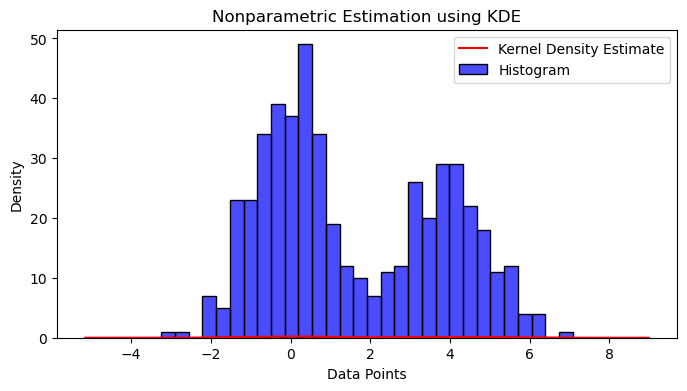

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic dataset (you can replace this with your own data)
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 300), np.random.normal(4, 1, 200)])

# Plot the histogram of the data
plt.figure(figsize=(8, 4))
sns.histplot(data, kde=False, bins=30, color='blue', alpha=0.7, label='Histogram')

# Plot the Kernel Density Estimate
sns.kdeplot(data, color='red', label='Kernel Density Estimate')

plt.title('Nonparametric Estimation using KDE')
plt.xlabel('Data Points')
plt.ylabel('Density')
plt.legend()
plt.show()


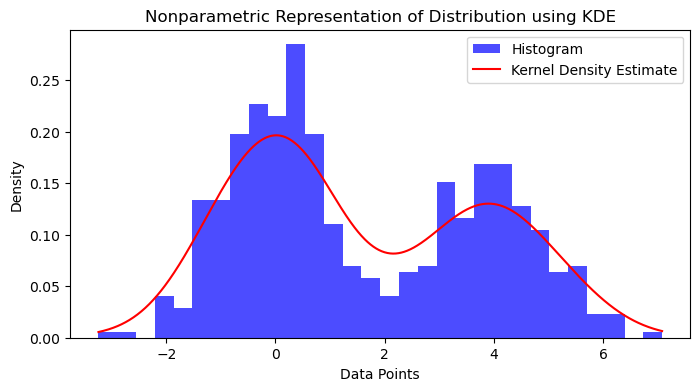

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Create a synthetic dataset (you can replace this with your own data)
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 300), np.random.normal(4, 1, 200)])

# Reshape the data to fit the scikit-learn API
data = data.reshape(-1, 1)

# Create a KDE model
kde = KernelDensity(bandwidth=0.75, kernel='gaussian')  # You can experiment with the bandwidth and kernel type

# Fit the KDE model to the data
kde.fit(data)

# Generate points for plotting
x_plot = np.linspace(min(data), max(data), 1000).reshape(-1, 1)

# Evaluate the KDE model on the generated points
log_dens = kde.score_samples(x_plot)

# Plot the histogram of the data
plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot the KDE estimate
plt.plot(x_plot, np.exp(log_dens), color='red', label='Kernel Density Estimate')

plt.title('Nonparametric Representation of Distribution using KDE')
plt.xlabel('Data Points')
plt.ylabel('Density')
plt.legend()
plt.show()


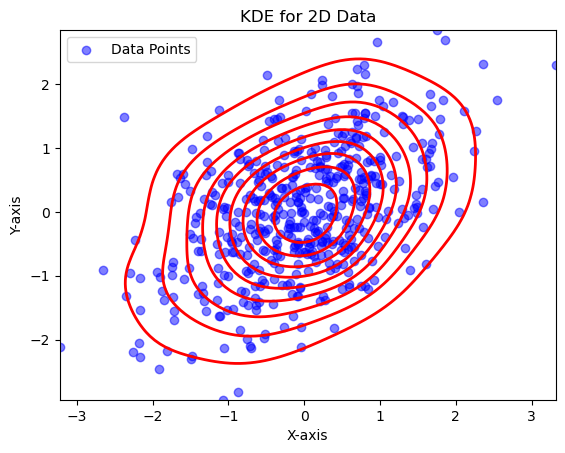

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Create synthetic 2D data (you can replace this with your own data)
np.random.seed(42)
data_2d = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=500)

# Create a KDE model for 2D data
kde_2d = KernelDensity(bandwidth=0.5, kernel='gaussian')  # You can experiment with the bandwidth and kernel type

# Fit the KDE model to the 2D data
kde_2d.fit(data_2d)

# Generate points for plotting in 2D
x_plot = np.linspace(min(data_2d[:, 0]), max(data_2d[:, 0]), 100)
y_plot = np.linspace(min(data_2d[:, 1]), max(data_2d[:, 1]), 100)
x_plot, y_plot = np.meshgrid(x_plot, y_plot)
xy_plot = np.column_stack([x_plot.ravel(), y_plot.ravel()])

# Evaluate the KDE model on the generated points
log_dens_2d = kde_2d.score_samples(xy_plot)

# Reshape the results for contour plotting
log_dens_2d = log_dens_2d.reshape(x_plot.shape)

# Plot the original 2D data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5, color='blue', label='Data Points')

# Plot contours of the KDE estimate
plt.contour(x_plot, y_plot, np.exp(log_dens_2d), levels=10, colors='red', linewidths=2)

plt.title('KDE for 2D Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


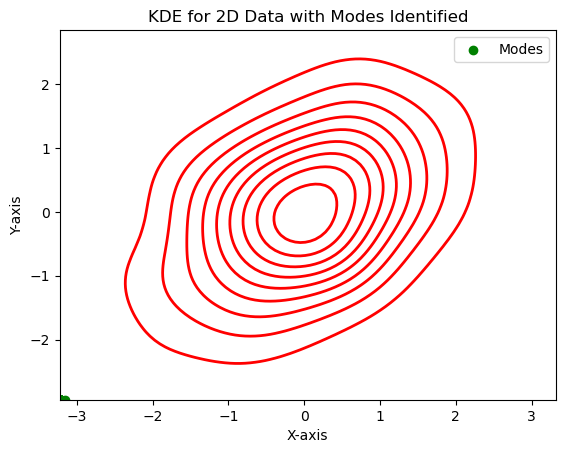

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.ndimage import label, generate_binary_structure

# Create synthetic 2D data (you can replace this with your own data)
np.random.seed(42)
data_2d = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=500)

# Create a KDE model for 2D data
kde_2d = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde_2d.fit(data_2d)

# Generate points for plotting in 2D
x_plot = np.linspace(min(data_2d[:, 0]), max(data_2d[:, 0]), 100)
y_plot = np.linspace(min(data_2d[:, 1]), max(data_2d[:, 1]), 100)
x_plot, y_plot = np.meshgrid(x_plot, y_plot)
xy_plot = np.column_stack([x_plot.ravel(), y_plot.ravel()])

# Evaluate the KDE model on the generated points
log_dens_2d = kde_2d.score_samples(xy_plot)

# Reshape the results for contour plotting
log_dens_2d = log_dens_2d.reshape(x_plot.shape)

# Identify modes using image processing techniques
structure = generate_binary_structure(2, 2)
local_maxima, num_maxima = label(log_dens_2d == np.max(log_dens_2d), structure=structure)

# Plot the original 2D data points
# plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5, color='blue', label='Data Points')

# Plot contours of the KDE estimate
plt.contour(x_plot, y_plot, np.exp(log_dens_2d), levels=10, colors='red', linewidths=2)

# Highlight identified modes
plt.scatter(xy_plot[local_maxima[:, :], 0], xy_plot[local_maxima[:, :], 1], color='green', marker='o', label='Modes')

plt.title('KDE for 2D Data with Modes Identified')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
